# Part 1: K-Nearest Neighbors

<img src='images/3.jpg' width=75%>


In [1]:
import pandas as pd
dc_listings = pd.read_csv('dc_airbnb.csv')

In [2]:
dc_listings.iloc[0]

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                            1.0
bathrooms                           1.0
beds                                2.0
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                      38.890046
longitude                    -77.002808
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object

In [3]:
dc_listings.iloc[0].beds

2.0

## 4. Euclidean Distance 

In [4]:
import numpy as np

In [5]:
our_acc_value = 3
first_living_space = dc_listings.iloc[0]['accommodates']
first_distance = np.abs(first_living_space-our_acc_value)

In [6]:
first_distance

1

In [7]:
# calculate all distance by using "apply()"
# now we will have distance with each accommodates
new_listing =3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x-new_listing))

## 6. Randomizing and Sorting

In [8]:
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings=dc_listings.sort_values('distance')
print(dc_listings.iloc[:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


## 7. Average Price


In [9]:
dc_listings['price']

577       $185.00
2166      $180.00
3631      $175.00
71        $128.00
1011      $115.00
          ...    
1596      $299.00
1818       $10.00
1402    $1,200.00
763     $1,000.00
1224      $499.00
Name: price, Length: 3723, dtype: object

In [10]:
stripped_commas = dc_listings['price'].str.replace(',','')
stripped_dollar = stripped_commas.str.replace('$','')


In [11]:
dc_listings['price'] = stripped_dollar.astype('float')
dc_listings['price']

577      185.0
2166     180.0
3631     175.0
71       128.0
1011     115.0
         ...  
1596     299.0
1818      10.0
1402    1200.0
763     1000.0
1224     499.0
Name: price, Length: 3723, dtype: float64

In [12]:
mean_price = dc_listings[0:5]['price'].mean()
mean_price

156.6

## 8. Function to Make Prediction


In [13]:
def predict_price(new_accommodates):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x:np.abs(x-new_accommodates))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    
    return predicted_price

In [14]:
print(f'predict_price(1):{predict_price(1)}')
print(f'predict_price(2):{predict_price(2)}')
print(f'predict_price(3):{predict_price(3)}')
print(f'predict_price(4):{predict_price(4)}')

predict_price(1):78.8
predict_price(2):126.0
predict_price(3):194.8
predict_price(4):197.6


# Part II. Evaluating Model Performance


## 1. Testing quality of predictions

In [15]:
# We split train_df and test_df from dc_listings

train_df= dc_listings.iloc[:2792]
test_df = dc_listings.iloc[2792:]
print(f'train_df:{train_df.shape}')
print(f'test_df:{test_df.shape}')

train_df:(2792, 20)
test_df:(931, 20)


In [17]:
test_df['predicted_price']=test_df['accommodates'].apply(predict_price)

<ipython-input-17-8ca464650540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price']=test_df['accommodates'].apply(predict_price)


In [21]:
test_df[['accommodates','price','predicted_price']].head()

,accommodates,price,predicted_price
2339,1,75.0,78.8
2116,5,220.0,183.2
3173,5,120.0,183.2
1472,5,199.0,183.2
1829,5,100.0,183.2


## 2. MAE (Mean Absolute Error)

In [22]:
test_df['error'] = np.absolute(test_df['price']-test_df['predicted_price'])

<ipython-input-22-362a4c856eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['error'] = np.absolute(test_df['price']-test_df['predicted_price'])


In [23]:
mae=test_df['error'].mean()
print(mae)

99.06680988184749


## 3. Mean Square Error
<img src='images/Snipaste_2023-10-31_14-02-41.jpg' width=75%>

In [24]:
test_df['squared_error']=(test_df['predicted_price']-test_df['price'])**2
mse = test_df['squared_error'].mean()
print(mse)

45529.13426423201


<ipython-input-24-e20013237a63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['squared_error']=(test_df['predicted_price']-test_df['price'])**2


## 4. Training another model

With the MSE above, it is difficult to say it is good or bad, we need to train another model for comparision. We compare it with no. of bathroom

In [25]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    #Note, we compare it with bathroom
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x:np.abs(x-new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()

    return predicted_price

In [30]:
test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squared_error'].mean()

<ipython-input-30-4806c104b59c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
<ipython-input-30-4806c104b59c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2


In [31]:
mse

38545.93752953813

In [33]:
rmse = mse**(.5)
print(rmse)

196.33119347046747


In [ ]:
## 6. Comparing MAE and RMSE

In [34]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])
mae_one = errors_one.sum()/len(errors_one)
rmse_one = np.sqrt((errors_one**2).sum()/len(errors_one))
print(mae_one)
print(rmse_one)

mae_two = errors_two.sum()/len(errors_two)
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))
print(mae_two)
print(rmse_two) 

7.5
7.905694150420948
62.5
235.82302686548658


## Consulsion: RMSE is generally more appearing than that of MAE. So it is better to use MAE

# Part III: Multivariate K-Mean Neighbors
## (Feature Selection / Feature Engineering ) 

## There are 2 ways to improve the "Accuracy" of the model(i.e. decrease the RMSE of the model)

- increase the no. of features (the attributes of the model)
- increase the K value

In [35]:
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
print(dc_listings.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude             37

In [36]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.isnull().sum())


accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [39]:
# The 2 columns cleaning_fee and security_deposit got too many missing v
dc_listings = dc_listings.drop(['cleaning_fee','security_deposit'], axis = 1)

In [41]:
# this will delete all the rows with missing values
dc_listings = dc_listings.dropna(axis=0)


In [42]:
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Draft section 

In [16]:
dc_listings.head()


,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,185.0,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,180.0,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,175.0,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,128.0,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,115.0,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0


## 4. Normalize columns

<img src='images/2.jpg' width=75%>



In [44]:
# We transform all the columns in the dc_listings dataframe to normalized_listings:
normalized_listings = (dc_listings - dc_listings.mean())/(dc_listings.std())

In [62]:
normalized_listings

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,-0.173345,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,-0.464148,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,-0.718601,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,0.437342,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,0.480962,-0.065038,-0.016553,0.646219
...,...,...,...,...,...,...,...,...
2763,-1.095499,-1.438810,-0.439151,-0.546858,-0.536849,0.487635,-0.016604,-0.482505
905,-1.095499,-1.438810,-0.439151,-0.546858,-0.391448,0.763971,-0.016573,-0.516709
1096,-0.596544,-0.249467,-2.143301,-0.546858,-0.355097,-0.341375,-0.016573,-0.003652
235,2.397185,0.939875,-0.439151,1.985752,0.328290,-0.341375,-0.016573,-0.243079


In [63]:
# Resume the price from dc_listings
normalized_listings['price']=dc_listings['price']

## 6. Introduction to Scikit-learn
## (A more quick and efficient way to cal. the distance)

## Steps of Scikit-learn workflow:
1. instantiate the machine learning model 
2. fit the model to Traning data
3. use the model to predict
4. evaluate the accuracy 


In [75]:
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates','bathrooms']

# Step 1:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5, metric = 'euclidean')

# Step 2:
knn.fit(train_df[train_columns],train_df['price'])

# Step 3:
predictions = knn.predict(test_df[train_columns])

# Step 4:
two_features_rmse = (mean_squared_error(test_df['price'],predictions))**(1/2)

print(two_features_rmse)

122.8498229500651


Note. brute is only of 3 algorithm, ( ball_tree and kb_tree) . 'brute' calculate all points in the dataset. It is simple, but computationally expensive when the dataset is large. other 2 algorithm might be more efficient when the dataset is large.

## 9. USE more features 

In [74]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'], four_predictions)
four_rmse = four_mse ** (1/2)
print(four_mse)
print(four_rmse)


13869.329692832765
117.76811832084593


In [76]:
# So using 4 features is doing better than using 2

## 10. Using all features

In [77]:
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

features = train_df.columns.tolist()
features.remove('price')

knn.fit(train_df[features], train_df['price'])
all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)
all_features_rmse = all_features_mse ** (1/2)
print(all_features_mse)
print(all_features_rmse)


15442.164095563137
124.26650431859399


In [ ]:
# It is worse than using 4 features. 

# Part IV: Hyberparameter Optimization 
## Increasing K value (the nubmer of nearby neighbors)


In [4]:
import pandas as pd


In [5]:
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

## 2. Hyperparameter Optimization 
* Hyperparameter = values that affected the performance of the model that are unrelated to the data itself is called this name!

### Grib Search: A simple but common hyperparameter optimization technique 
	• selecting a subset of the possible hyperparameter values,
	• training a model using each of these hyperparameter values,
	• evaluating each model's performance,
	• selecting the hyperparameter value that resulted in the lowest error value.

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [1, 2, 3, 4, 5]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

print(mse_values)

[26383.573378839592, 15141.584755403868, 14668.555302743012, 16350.487272468714, 14531.693014789536]


In [ ]:
# Let expanding the k to 20

In [14]:
hyper_params_20 = list(range(1,21))

In [15]:
for hp in hyper_params_20:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

print(mse_values)

[26383.573378839592, 15141.584755403868, 14668.555302743012, 16350.487272468714, 14531.693014789536, 26383.573378839592, 15141.584755403868, 14668.555302743012, 16350.487272468714, 14531.693014789536, 26383.573378839592, 15141.584755403868, 14668.555302743012, 16350.487272468714, 14531.693014789536, 13697.154689672607, 14183.521069861394, 14674.857241894199, 14462.384331240606, 14421.484914675768, 14669.733496930206, 14722.459502591326, 14699.976614092131, 14754.135218592555, 14728.898515990393, 14869.765336141923, 14851.623935661393, 14801.00862722791, 14843.408166545336, 14723.310702502844]


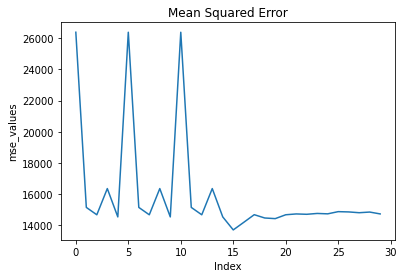

In [18]:
import matplotlib.pyplot as plt
x_values = range(len(mse_values))

plt.plot(x_values, mse_values)
plt.title('Mean Squared Error')
plt.xlabel('Index')
plt.ylabel('mse_values')
plt.show()

In [20]:
min(mse_values)

13697.154689672607

## 6.Practice the workflow (using more features)

In [21]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)

three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse)
print(three_hyp_mse)

{5: 15219.375199089876}
{5: 13441.077224118315}


# Part V: Cross Validation (holdout validation)

In [24]:
import numpy as np
import pandas as pd
dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)
split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
# First half
model = KNeighborsRegressor()
model.fit(train_one[["accommodates"]], train_one["price"])
test_one["predicted_price"] = model.predict(test_one[["accommodates"]])
iteration_one_rmse = mean_squared_error(test_one["price"], test_one["predicted_price"])**(1/2)

# Second half
model.fit(train_two[["accommodates"]], train_two["price"])
test_two["predicted_price"] = model.predict(test_two[["accommodates"]])
iteration_two_rmse = mean_squared_error(test_two["price"], test_two["predicted_price"])**(1/2)
avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])
print(iteration_one_rmse, iteration_two_rmse, avg_rmse)

136.79629996473165 117.32117603341973 127.05873799907569


## 3. K-Fold Cross Validation 
<img src='images/4.jpg' width=950>

In [34]:
# Note: 1. how it split different fold in the Dataframe
# 2. how it use value_counts on each fold

dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"]  = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5
print(dc_listings['fold'].value_counts())
print("\n Num of missing values: ", dc_listings['fold'].isnull().sum())

fold
1.0    745
2.0    745
5.0    745
3.0    744
4.0    744
Name: count, dtype: int64

 Num of missing values:  0


In [42]:
import numpy as np
fold_ids = [1,2,3,4,5]
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Train
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold].copy()
        model.fit(train[["accommodates"]], train["price"])
        # Predict
        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)
    
rmses = train_and_validate(dc_listings, fold_ids)
print(rmses)
avg_rmse = np.mean (rmses)
print (avg_rmse)

[163.79710988919703, 99.07614778746036, 125.01331714007749, 189.52780600036456, 117.52288756098167]
138.98745367561622


## 6. Performing K-Fold Cross Validation Using Scikit-Learn

<img src='images/6.jpg' width=75%><br><br>
<img src='images/7.jpg' width=75%>


In [44]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True, random_state=1) # 5 = n_splits
model = KNeighborsRegressor()
mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"],
                        scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)
print(rmses)
print(avg_rmse)

[133.91896378 136.79238823 114.58710775 141.27819387 115.31971103]
128.37927293136588


## 7. Exploring Different K Values
<br><b> We chose k-fold with the value = 10(according to experience of Data Scienists)<br><br>


<img src='images/8.jpg' width=75%>




## 8. Bias - Variance Tradoff

# Note: k-neaerest neigbors is not a Mathematical model! It can't exist without original data. 

<img src='images/9.jpg' width=75%>


# ~~~~~~~~~~~~~~~~~~~~~~~~~~
# Draft area 
